# 1. Preprocess and Explore the Dataset

### a) Load the dataset into a NumPy array

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the CSV file into the two-dimensional array "data"
# using numpy's function genfromtxt
data = np.genfromtxt('glass.data.csv', delimiter=',')

In [3]:
# print the shape of the array "data"
print("Shape of data set:",data.shape)

Shape of data set: (214, 11)


### b) Define your X (features) and y (labels) matrices and show their dimensionality.

In [4]:
# Assign to the array "X" the features from the array "data"
X = data[:, 1:-1] # All columns except the first and  last one
print("Shape of X: ",X.shape)

Shape of X:  (214, 9)


In [5]:
# Assign to the array "y" the labels from the array "data"
y = data[:, -1]
y=y.reshape(-1, 1)
print("Shape of y:",y.shape)

Shape of y: (214, 1)


### c) Show the first 5 rows of X.

In [7]:
print("First 5 rows of the X:")
print(X[:5])

First 5 rows of the X:
[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


### d) Find the number of unique values in y.

In [48]:
k=np.unique(y)
print("Unique Values of y:",k)
print("No. of unique values in y: ",len(k))

Unique Values of y: [1. 2. 3. 5. 6. 7.]
No. of unique values in y:  6


### e) Calculate summary stastics: the mean, standard deviation, minimum, and maximum values for each feature.

In [52]:
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)

print('Mean Values:', np.round(mean_vals, 4))
print('Standard Deviation:', np.round(std_dev,4))
print('Min Values:', np.round(min_vals, 4))
print('Max Values:', np.round(max_vals,4))

Mean Values: [1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01 4.97100e-01
 8.95700e+00 1.75000e-01 5.70000e-02]
Standard Deviation: [0.003  0.8147 1.439  0.4981 0.7727 0.6507 1.4198 0.4961 0.0972]
Min Values: [ 1.5112 10.73    0.      0.29   69.81    0.      5.43    0.      0.    ]
Max Values: [ 1.5339 17.38    4.49    3.5    75.41    6.21   16.19    3.15    0.51  ]


### f) Plot a histogram for each of the features.

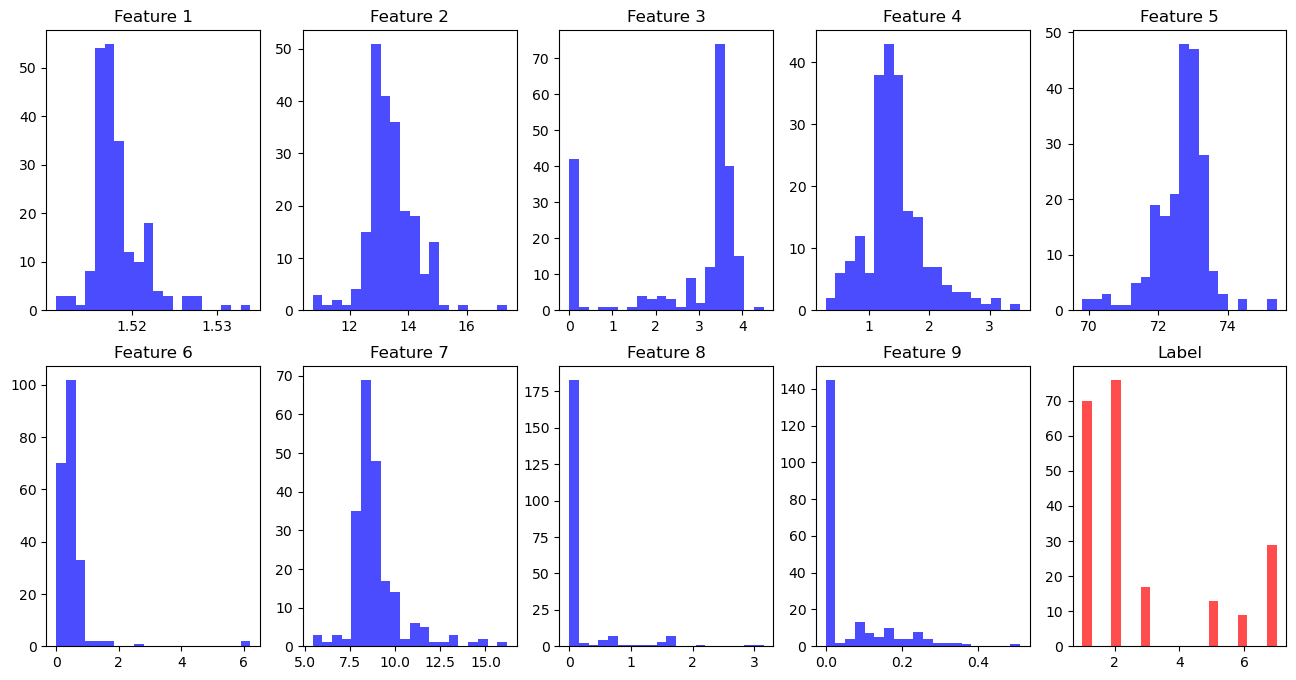

In [8]:
# Visualization
fig, axs = plt.subplots(2, 5, figsize=(16, 8))  # 2 rows, 5 columns for 10 subplots

# Plotting the histogram for each feature in X
for i in range(2):
    for j in range(5):
        if i * 5 + j < X.shape[1]: 
            axs[i, j].hist(X[:, i * 5 + j], bins=20, color='blue', alpha=0.7)
            axs[i, j].set_title(f'Feature {i * 5 + j + 1}')

# Plotting histogram for the label y
axs[1, 4].hist(y, bins=20, color='red', alpha=0.7)
axs[1, 4].set_title('Label')

plt.show()

### h) Calculate the correlation on matrix between all the features

<Figure size 1200x1200 with 0 Axes>

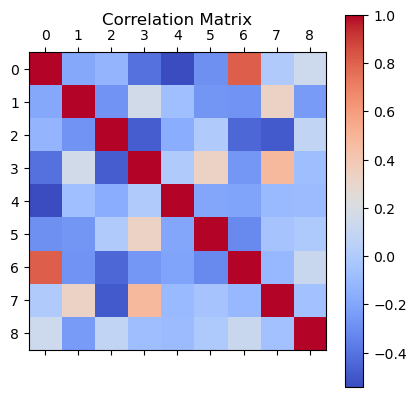

In [9]:
# Calculate the correlation matrix
cor_matrix = np.corrcoef(X, rowvar=False)

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
cax = plt.matshow(cor_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()

### i) If appropriate, use the One-Hot encoder.

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_enc = encoder.fit_transform(y.reshape(-1, 1))
print(y_enc.shape)
print((y_enc))

(214, 6)
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


### j) Perform train/test split.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(171, 9) (171, 6)
(43, 9) (43, 6)


### g) Perform normalization /standardization.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 2. Create the Neural Network Model

### a) Create a Sequential model with several dense layers. Use appropriate activationfunctions and initialization methods

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Build the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(12, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='softmax'))

### b) Compile the Model: Choose an appropriate optimizer, loss function, and metrics.

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### c) Print a summary of the model

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________
None


# 3. Train and evaluate the Model

### a) Train the model using the training data. Choose appropriate values for the batch size and validation split.

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
5/5 [==============================] - 1s 97ms/step - loss: 2.0795 - accuracy: 0.1250 - val_loss: 2.2628 - val_accuracy: 0.1714
Epoch 2/150
5/5 [==============================] - 0s 23ms/step - loss: 2.0218 - accuracy: 0.1544 - val_loss: 2.1889 - val_accuracy: 0.1714
Epoch 3/150
5/5 [==============================] - 0s 12ms/step - loss: 1.9772 - accuracy: 0.1912 - val_loss: 2.1208 - val_accuracy: 0.1714
Epoch 4/150
5/5 [==============================] - 0s 13ms/step - loss: 1.9328 - accuracy: 0.2059 - val_loss: 2.0613 - val_accuracy: 0.2000
Epoch 5/150
5/5 [==============================] - 0s 11ms/step - loss: 1.8929 - accuracy: 0.2353 - val_loss: 2.0081 - val_accuracy: 0.1714
Epoch 6/150
5/5 [==============================] - 0s 12ms/step - loss: 1.8569 - accuracy: 0.3162 - val_loss: 1.9561 - val_accuracy: 0.1714
Epoch 7/150
5/5 [==============================] - 0s 12ms/step - loss: 1.8229 - accuracy: 0.3750 - val_loss: 1.9057 - val_accuracy: 0.1714
Epoch 8/150
5/5 [===

### b) Evaluate the model's performance on the test data.

In [26]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 5ms/step - loss: 1.0769 - accuracy: 0.6512
Test Loss: 1.0768624544143677
Test Accuracy: 0.6511628031730652
2/2 [==============================] - 0s 4ms/step
(43, 6) (43, 6)


### c) Plot confusion matrix and the classification report.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)

cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cr)

[[14  6  0  0  0]
 [ 2  8  0  0  0]
 [ 1  2  0  0  0]
 [ 1  0  0  0  0]
 [ 1  2  0  0  6]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.44      0.80      0.57        10
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         9

    accuracy                           0.65        43
   macro avg       0.44      0.43      0.42        43
weighted avg       0.66      0.65      0.63        43



C:\Users\deepi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepi\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### d) Visualize the model training history for the accuracy and loss metrics

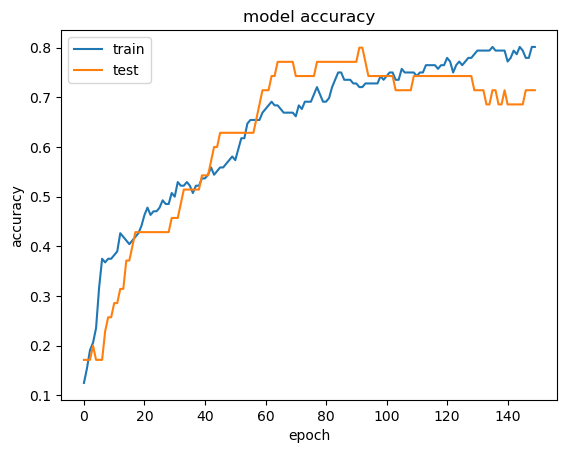

In [28]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

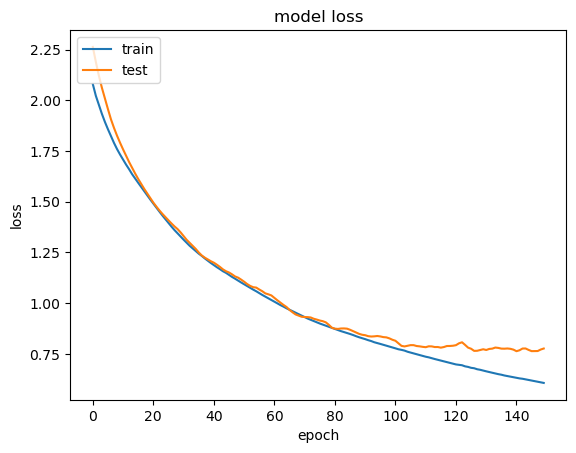

In [29]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()